Time taken for k=1: 0.76820207 seconds


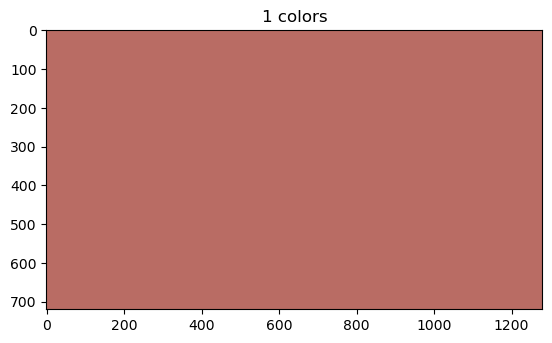

Time taken for k=2: 0.90164304 seconds


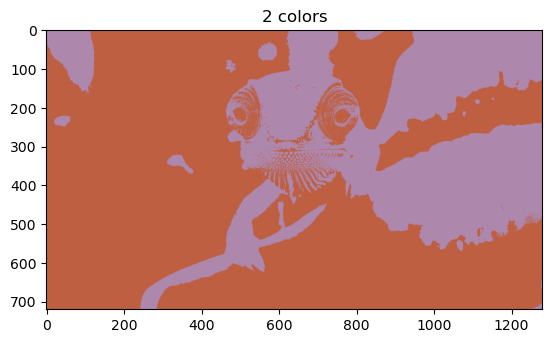

Time taken for k=3: 1.82777786 seconds


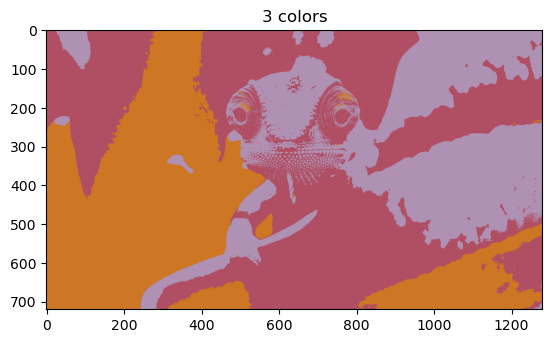

Time taken for k=4: 1.41335320 seconds


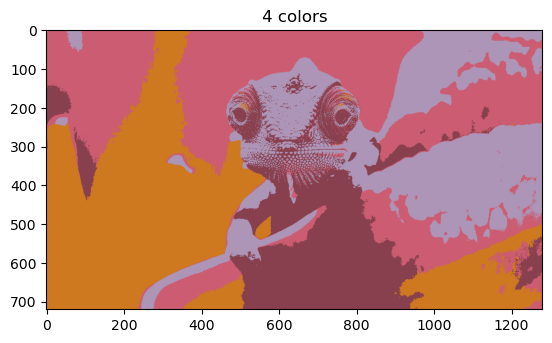

Time taken for k=5: 1.51207328 seconds


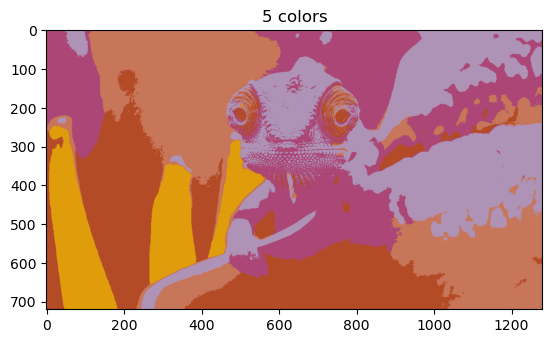

Time taken for k=6: 1.66480589 seconds


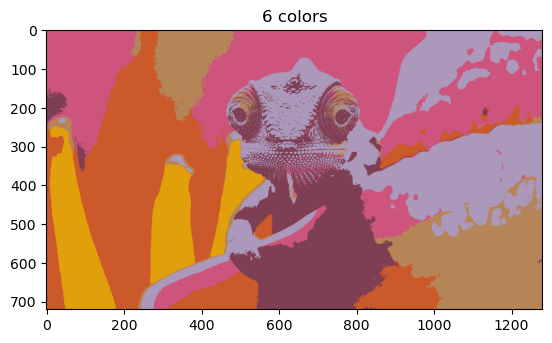

Time taken for k=7: 2.39855695 seconds


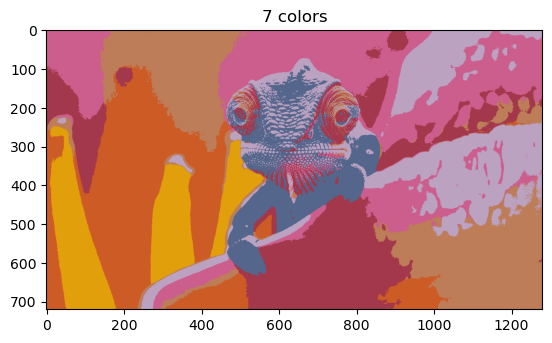

Time taken for k=8: 2.33864999 seconds


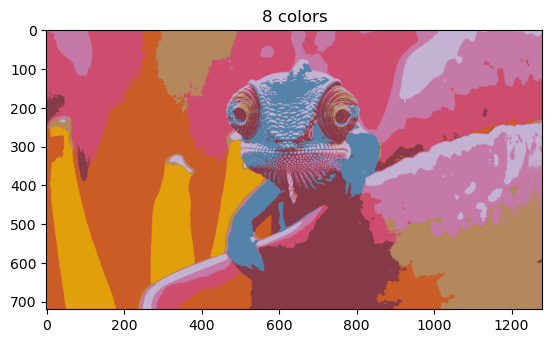

Time taken for k=9: 2.69656301 seconds


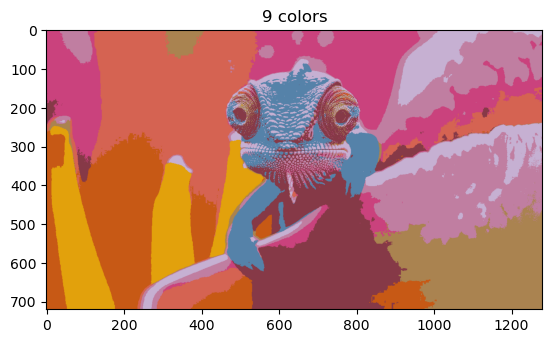

Time taken for k=10: 2.38105774 seconds


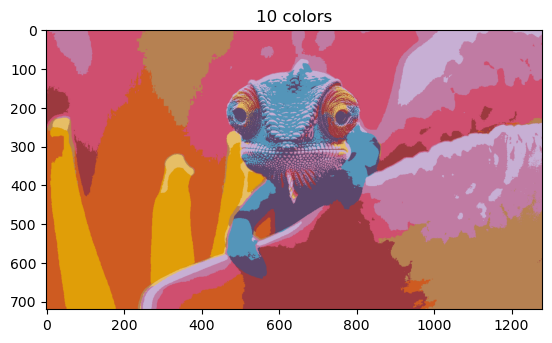

Time taken for k=16: 3.37527895 seconds


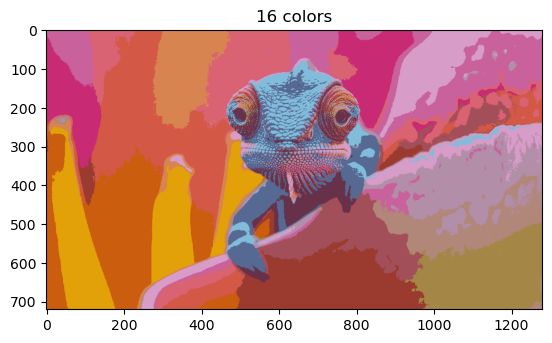

Time taken for k=32: 4.37142301 seconds


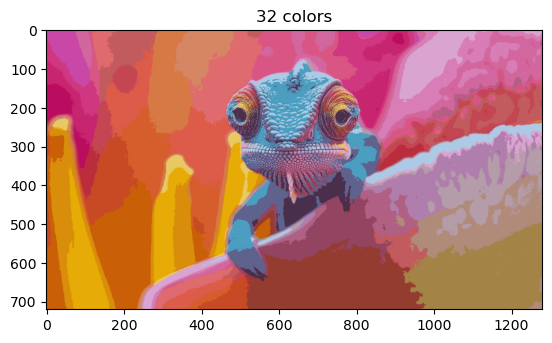

Time taken for k=64: 5.16077805 seconds


/var/folders/gp/6qv1k00n7s11_v7lwph8w1q40000gn/T/ipykernel_21573/2498429839.py:50: RuntimeWarning: invalid value encountered in cast
  new_image = new_pixels.reshape(image.shape).astype(np.uint8)  # Reshape pixel array into image shape


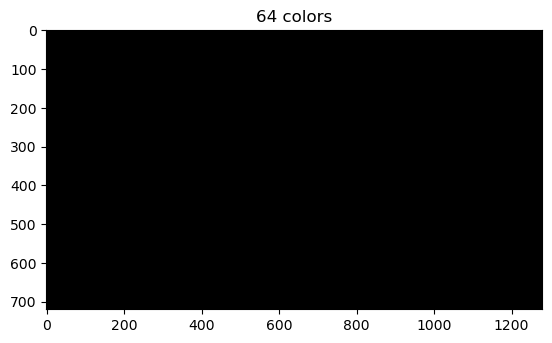

Time taken for k=128: 13.17569613 seconds


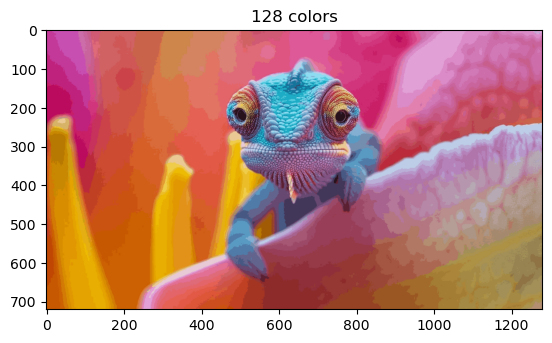

Time taken for k=256: 18.01169586 seconds


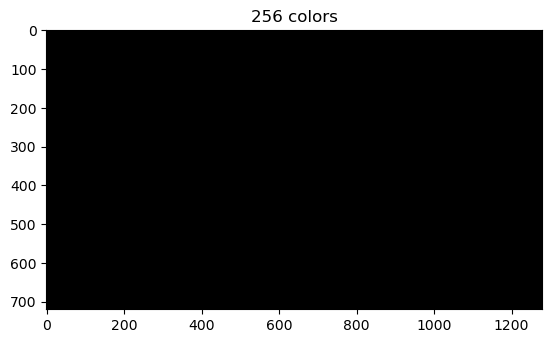

Total time taken: 65.11358070 seconds


In [3]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

np.random.seed(7)

def get_initial_centroids(X, k):
    """ Efficiently select k unique random centroids from dataset X. """
    indices = np.random.choice(X.shape[0], k, replace=False)  # Randomly select k unique indices
    return X[indices]  # Return the corresponding centroids

def get_euclidean_distance(A, B):
    """ Compute the Euclidean distance matrix between sets A and B using vectorized operations. """
    A_sum = np.sum(np.square(A), axis=1)
    B_sum = np.sum(np.square(B), axis=1)
    dist_matrix = np.sqrt(A_sum[:, np.newaxis] + B_sum - 2 * np.dot(A, B.T))
    return dist_matrix


def assign_clusters(X, centroids):
    """ Assign each point in X to the nearest centroid using a fully vectorized approach. """
    distances = get_euclidean_distance(X, centroids)  # Compute distances between points and centroids
    closest_centroids = np.argmin(distances, axis=1)  # Find the index of the closest centroid for each point
    # Create a dictionary where keys are centroid indices and values are arrays of points assigned to each centroid
    return {i: X[closest_centroids == i] for i in range(centroids.shape[0])}

def update_centroids(clusters):
    """ Calculate new centroids as the mean of all points assigned to each cluster. """
    # Compute the mean of points assigned to each cluster using vectorized operations
    return np.array([np.mean(cluster, axis=0) for cluster in clusters.values()])

def perform_k_means(X, k, tolerance=4):
    """ Vectorized k-means algorithm implementation. """
    centroids = get_initial_centroids(X, k)  # Initialize centroids
    for _ in range(10):  # Limit the number of iterations
        clusters = assign_clusters(X, centroids)  # Assign points to clusters
        new_centroids = update_centroids(clusters)  # Update centroids based on assigned points
        if np.linalg.norm(new_centroids - centroids) < tolerance:  # Check convergence
            break
        centroids = new_centroids  # Update centroids for next iteration
    return centroids

def get_reduced_colors_image(image, num_colors):
    """ Reduce the number of colors in the image by performing k-means clustering on pixel values. """
    pixels = image.reshape(-1, 3).astype(np.float32)  # Reshape image into a 2D array of pixels
    centroids = perform_k_means(pixels, num_colors)  # Perform k-means clustering on pixels
    # Assign each pixel to its nearest centroid and map it to the corresponding centroid value
    new_pixels = np.array([centroids[i] for i in np.argmin(get_euclidean_distance(pixels, centroids), axis=1)])
    new_image = new_pixels.reshape(image.shape).astype(np.uint8)  # Reshape pixel array into image shape
    return new_image

if __name__ == '__main__':
    img = cv2.imread("image.webp")  # Read the input image
    k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 32, 64, 128, 256]  # List of k values to iterate over
    reconstrutons = []
    start_time = time.time()  # Record start time
    for k in k_values:
        start_function_time = time.time()  # Record start time of function execution
        reduced_colors_image = get_reduced_colors_image(img, k)  # Get image with reduced colors
        function_time = time.time() - start_function_time  # Calculate time taken for function execution
        cv2.imwrite(f"image/k{k}.webp", reduced_colors_image)  # Write the reduced color image to file
        print(f"Time taken for k={k}: {function_time:.8f} seconds") 
        plt.title(f"{k} colors")
        plt.imshow(cv2.cvtColor(reduced_colors_image, cv2.COLOR_BGR2RGB))
        plt.show()
        reconstrutons.append(reduced_colors_image) # Print time taken for this k value
    total_time = time.time() - start_time  # Calculate total time taken
    print(f"Total time taken: {total_time:.8f} seconds")  # Print total time taken


